In [3]:
%pip install polars
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
import missingno as no

  Obtaining dependency information for polars from https://files.pythonhosted.org/packages/d0/61/56c02350afb80ff9ab22272d5dc448cb43643c769afea1ea171a034426c0/polars-0.20.25-cp38-abi3-macosx_10_12_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 18.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
#For making pretty LaTeX plots
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 18,
    "axes.titlesize": 18,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "figure.figsize": (8, 6),
    "figure.dpi": 100,
    "savefig.dpi": 200,
    "savefig.format": "png",
    "savefig.transparent": True,
    "axes.grid": True,
    "grid.linewidth": 0.5,
    "grid.linestyle": "--",
    "grid.color": "0.8",
    "image.cmap": "Blues",
    "lines.linewidth": 1.5,
    "lines.markersize": 6,
    "text.usetex": True, "mathtext.fontset": "cm",
    "pgf.preamble": r"\usepackage[utf8]{inputenc}\usepackage[T1]{fontenc}\usepackage{cmbright}"
})

In [6]:
# train_data = pl.read_csv("../data/raw/training_set_VU_DM.csv", null_values=["NULL", "NA", ""])
# test_data = pl.read_csv("../data/raw/test_set_VU_DM.csv", null_values=["NULL", "NA", ""])

In [7]:
train_data.describe()

statistic,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
str,f64,str,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,str,str,str,f64,f64,f64,f64,f64,f64,str,str,str,f64,f64,f64,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64
"""count""",4.958347e6,"""4958347""",4.958347e6,4.958347e6,"""251866""","""252988""",4.958347e6,4.958347e6,4.958347e6,4.950983e6,4.958347e6,4.958347e6,3.867999e6,4.958347e6,4.958347e6,4.958347e6,4.958347e6,4.958347e6,4.958347e6,4.958347e6,4.958347e6,4.958347e6,4.958347e6,4.958347e6,"""317406""",3.350565e6,4.958347e6,"""119930""","""129559""","""94439""",2.024672e6,2.130269e6,556238.0,1.534288e6,1.65099e6,472797.0,"""307378""","""343663""","""131086""",2.222373e6,2.36002e6,841099.0,"""240157""","""260976""","""96174""","""315348""","""356422""","""138515""",1.916654e6,1.987503e6,614730.0,4.958347e6,138390.0,4.958347e6
"""null_count""",0.0,"""0""",0.0,0.0,"""4706481""","""4705359""",0.0,0.0,0.0,7364.0,0.0,0.0,1.090348e6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""4640941""",1.607782e6,0.0,"""4838417""","""4828788""","""4863908""",2.933675e6,2.828078e6,4.402109e6,3.424059e6,3.307357e6,4.48555e6,"""4650969""","""4614684""","""4827261""",2.735974e6,2.598327e6,4.117248e6,"""4718190""","""4697371""","""4862173""","""4642999""","""4601925""","""4819832""",3.041693e6,2.970844e6,4.343617e6,0.0,4.819957e6,0.0
"""mean""",166366.561096,null,9.953133,175.340453,null,null,173.973897,70079.179496,3.180525,3.777777,0.634699,2.872589,0.130385,4.317913,16.856236,254.20959,0.21562,14042.630393,2.385427,37.474165,1.972637,0.350492,1.110525,0.502213,null,1301.234406,0.2959,null,null,null,0.04419,0.03931,18.490732,0.01729,0.057769,27.071559,null,null,null,0.022676,0.051429,29.851903,null,null,null,null,null,null,-0.060899,0.009963,22.430384,0.044749,386.283316,0.027911
"""std""",96112.230102,null,7.64689,65.916249,null,null,68.345248,40609.920378,1.051024,1.050329,0.481514,1.531011,0.159463,1.834869,10.425655,16001.237061,0.411252,8111.843351,2.053243,51.993411,0.857063,0.732569,0.417229,0.499995,null,2023.951353,0.456446,null,null,null,0.448424,0.234239,240.113851,0.457581,0.29482,1012.919911,null,null,null,0.521757,0.267836,1340.262382,null,null,null,null,null,null,0.469172,0.202914,895.965854,0.206751,821.190577,0.164716
"""min""",1.0,"""2012-11-01 00:08:29""",1.0,1.0,"""1.41""","""0.0""",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,"""-10.0001""",0.01,0.0,"""-1""","""-1""","""10""",-1.0,-1.0,2.0,-1.0,-1.0,2.0,"""-1""","""-1""","""10""",-1.0,-1.0,2.0,"""-1""","""-1""","""10""","""-1""","""-1""","""10""",-1.0,-1.0,2.0,0.0,0.0,0.0
"""25%""",82936.0,null,5.0,100.0,null,null,100.0,35010.0,3.0,3.5,0.0,1.79,0.019,4.45,8.0,85.0,0.0,7101.0,1.0,4.0,2.0,0.0,1.0,0.0,null,139.8,0.0,null,null,null,0.0,0.0,7.0,0.0,0.0,7.0,null,null,null,0.0,0.0,7.0,null,null,null,null,null,null,0.0,0.0,7.0,0.0,124.0,0.0
"""50%""",166507.0,null,5.0,219.0,null,null,219.0,69638.0,3.0,4.0,1.0,2.77,0.069,4.91,16.0,122.0,0.0,13541.0,2.0,17.0,2.0,0.0,1.0,1.0,null,386.6,0.0,null,null,null,0.0,0.0,11.0,0.0,0.0,11.0,null,null,null,0.0,0.0,12.0,null,null,null,null,null

In [8]:
pd_train = train_data.sample(fraction=0.1).to_pandas()
pd_test = test_data.sample(fraction=0.1).to_pandas()

/Users/sophieengels/anaconda3/lib/python3.11/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
/Users/sophieengels/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

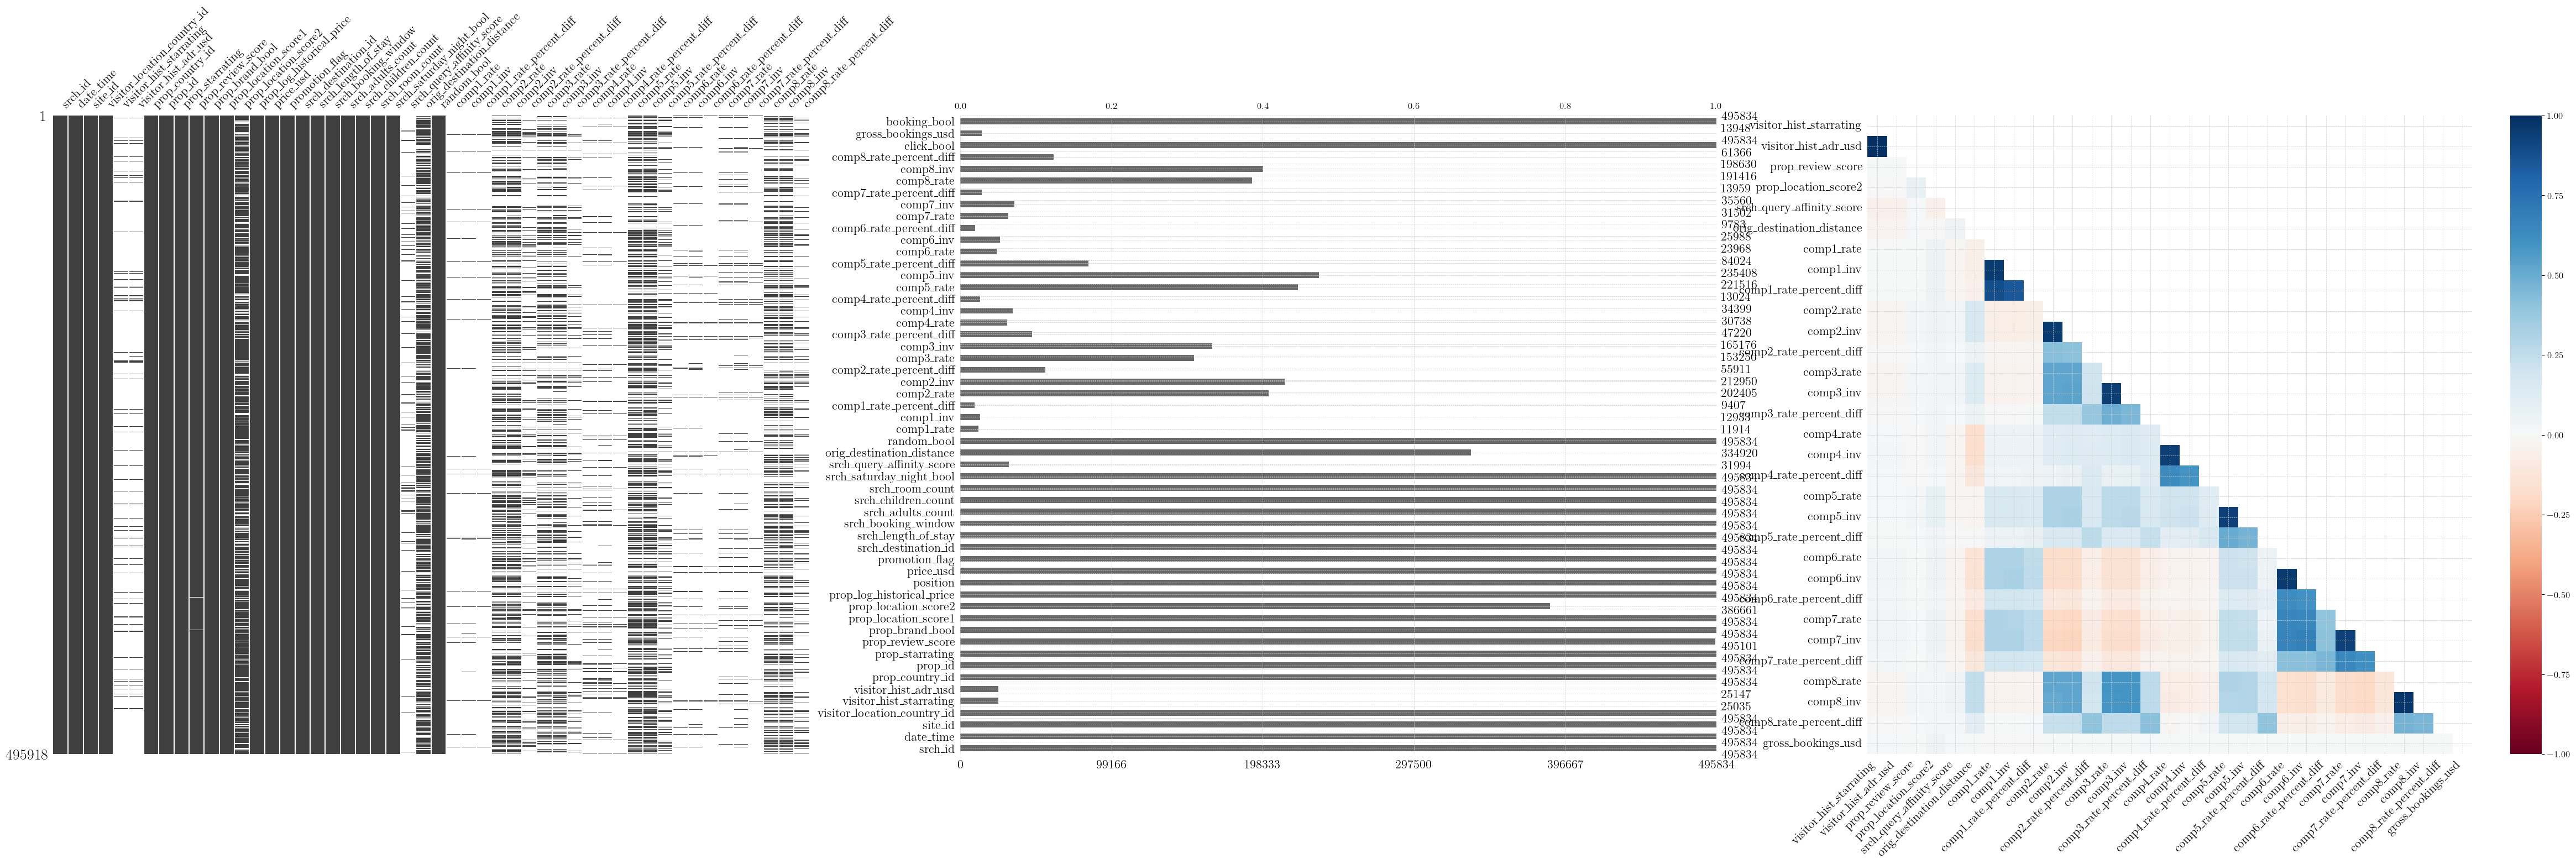

In [9]:
#  Missing data, using missingno, put everything in one figure

fig, ax = plt.subplots(1, 3, figsize=(60, 15))

no.matrix(pd_test, ax=ax[0])
no.bar(pd_train, ax=ax[1])
no.heatmap(pd_train, ax=ax[2])





In [ ]:
train_data.head()

srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
i64,str,i64,i64,str,str,i64,i64,i64,f64,i64,f64,f64,f64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,str,f64,i64,str,str,str,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,i64,str,str,str,str,str,str,i64,i64,i64,i64,f64,i64
1,"""2013-04-04 08:32:15""",12,187,null,null,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,null,null,1,null,null,null,0,0,null,0,0,null,null,null,null,0,0,null,null,null,null,null,null,null,0,0,null,0,null,0
1,"""2013-04-04 08:32:15""",12,187,null,null,219,10404,4,4.0,1,2.2,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,null,null,1,null,null,null,null,null,null,0,0,null,null,null,null,0,1,null,null,null,null,null,null,null,0,0,null,0,null,0
1,"""2013-04-04 08:32:15""",12,187,null,null,219,21315,3,4.5,1,2.2,0.0245,4.92,21,179.8,0,23246,1,0,4,0,1,1,null,null,1,null,null,null,0,0,null,0,0,null,null,null,null,0,0,null,null,null,null,null,null,null,0,0,null,0,null,0
1,"""2013-04-04 08:32:15""",12,187,null,null,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,null,null,1,null,null,null,-1,0,5,-1,0,5,null,null,null,0,1,null,null,null,null,null,null,null,-1,0,5,0,null,0
1,"""2013-04-04 08:32:15""",12,187,null,null,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,null,null,1,null,null,null,0,0,null,0,0,null,null,null,null,0,0,null,null,null,null,null,null,null,0,0,null,0,null,0


In [ ]:
test_data.head()

srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
i64,str,i64,i64,str,str,i64,i64,i64,f64,i64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,str,f64,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,i64,i64,i64
1,"""2013-02-02 15:27:40""",24,216,null,null,219,3180,3,4.5,1,2.94,0.0691,5.03,119.0,0,19222,1,10,2,0,1,0,null,null,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1,"""2013-02-02 15:27:40""",24,216,null,null,219,5543,3,4.5,1,2.64,0.0843,4.93,118.0,0,19222,1,10,2,0,1,0,null,null,0,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1,"""2013-02-02 15:27:40""",24,216,null,null,219,14142,2,3.5,1,2.71,0.0556,4.16,49.0,0,19222,1,10,2,0,1,0,null,null,0,null,null,null,0,0,null,null,null,null,null,null,null,1,0,10,null,null,null,null,null,null,null,null,null
1,"""2013-02-02 15:27:40""",24,216,null,null,219,22393,3,4.5,1,2.4,0.0561,5.03,143.0,0,19222,1,10,2,0,1,0,null,null,0,null,null,null,0,0,null,null,null,null,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null
1,"""2013-02-02 15:27:40""",24,216,null,null,219,24194,3,4.5,1,2.94,0.209,4.72,79.0,0,19222,1,10,2,0,1,0,null,null,0,null,null,null,0,0,null,null,null,null,null,null,null,0,0,null,null,null,null,null,null,null,null,null,null


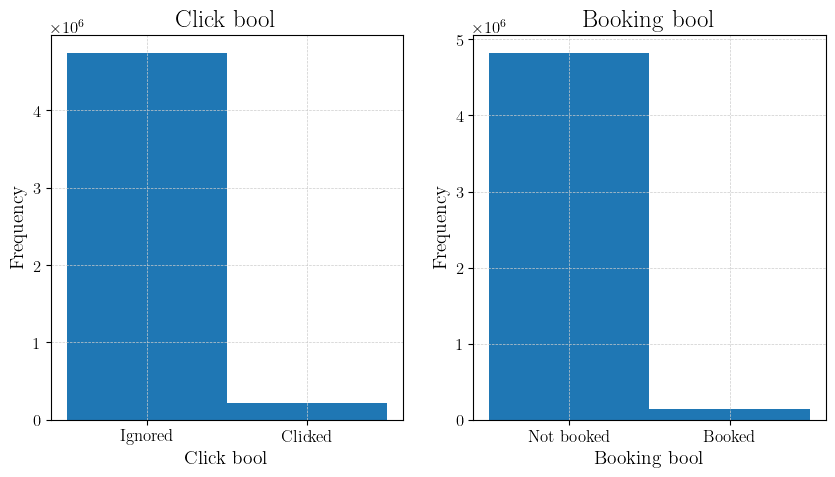

In [ ]:
# plot distribution of 'click_bool' and 'booking_bool'

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(train_data.select("click_bool").to_numpy(), bins=2)
ax[0].set_title("Click Bool")
ax[0].set_ylabel("Frequency")
ax[0].set_xticks([0.25, 0.75])
ax[0].set_xticklabels(["Ignored", "Clicked"])

ax[1].hist(train_data.select("booking_bool").to_numpy(), bins=2)
ax[1].set_title("Booking Bool")
ax[1].set_ylabel("Frequency")
ax[1].set_xticks([0.25, 0.75])
ax[1].set_xticklabels(["Not Booked", "Booked"])
plt.show()


In [ ]:
# get lenght of intersection and union of unique hotel_ids in train and test data
train_hotel_ids = set(train_data['prop_id'].unique())
test_hotel_ids = set(test_data['prop_id'].unique())

intersection = train_hotel_ids.intersection(test_hotel_ids)
union = train_hotel_ids.union(test_hotel_ids)
print(f"Intersection: {len(intersection)}")
print(f"Union: {len(union)}")
print(f'IDs not in train: {len(train_hotel_ids - test_hotel_ids)}')
print(f'IDs not in test: {len(test_hotel_ids - train_hotel_ids)}')


# for both train and test get the number of rows for which their id is not in the other dataset
train_only = train_hotel_ids-test_hotel_ids
test_only = test_hotel_ids-train_hotel_ids

train_only_rows = train_data.filter(pl.col("prop_id").is_in(train_only)).shape[0]
test_only_rows = test_data.filter(pl.col("prop_id").is_in(test_only)).shape[0]

print(f"Train only rows: {train_only_rows}, representing {train_only_rows/train_data.shape[0]*100:.2f}% of the data")
print(f"Test only rows: {test_only_rows}, representing {test_only_rows/test_data.shape[0]*100:.2f}% of the data")

Intersection: 121665
Union: 136886
IDs not in train: 7448
IDs not in test: 7773
Train only rows: 12891, representing 0.26% of the data
Test only rows: 13849, representing 0.28% of the data


In [ ]:
# subsample to experiment on

train_data = train_data.sample(fraction=0.1)
test_data = test_data.sample(fraction=0.1)

train_data = train_data.fill_null(strategy='forward')
train_data = train_data.fill_null(strategy='backward')
test_data = test_data.fill_null(strategy='forward')
train_data = train_data.fill_null(strategy='backward')



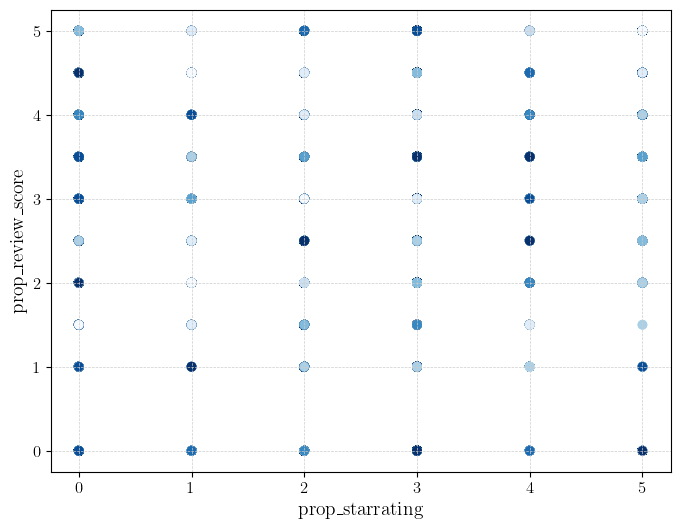

In [ ]:
# try k_means clustering, the clusters can then be used as a feature in the model

from sklearn.cluster import KMeans
import polars.selectors as cs


kmeans = KMeans(n_clusters=10, random_state=0).fit(train_data.select(cs.numeric()).to_numpy())

train_data = train_data.with_columns(pl.lit(kmeans.labels_).alias('cluster'))
train_data.head()

# visualize 2d project of the clusters

fig, ax = plt.subplots()
ax.scatter(train_data['prop_starrating'], train_data['prop_review_score'], c=train_data['cluster'])
ax.set_xlabel('prop_starrating')
ax.set_ylabel('prop_review_score')
plt.show()


- Firstly, we should probably only predict out of the set of hotels that share the location with the query hotel.
- 

In [ ]:
def order_hotels(query):
    # Sort by 'booking_bool' and 'click_bool' in descending order simultaneously
    query = query.sort(['booking_bool', 'click_bool'], descending=[True, True])
    return query

def get_output(df):
    # get the order of hotels for each query
    query_order = df.group_by('srch_id').map_groups(order_hotels)
    query_and_hotel = pl.DataFrame({'srch_id': query_order['srch_id'], 'prop_id': query_order['prop_id']})
    return query_and_hotel.sort('srch_id')

In [ ]:
# map each query to its order of hotels
query_and_hotel = get_output(train_data)
print(query_and_hotel)

shape: (495_834, 2)
┌─────────┬─────────┐
│ srch_id ┆ prop_id │
│ ---     ┆ ---     │
│ i64     ┆ i64     │
╞═════════╪═════════╡
│ 1       ┆ 56880   │
│ 1       ┆ 893     │
│ 1       ┆ 50984   │
│ 1       ┆ 97247   │
│ 1       ┆ 10404   │
│ …       ┆ …       │
│ 332784  ┆ 82051   │
│ 332784  ┆ 55158   │
│ 332784  ┆ 5988    │
│ 332784  ┆ 48216   │
│ 332785  ┆ 55110   │
└─────────┴─────────┘


In [ ]:
# Test if each search id still has the same hotels
for i in query_and_hotel['srch_id'].unique().sample(fraction=0.01):
    assert (set(train_data.filter(pl.col('srch_id') == i)['prop_id']) - set(query_and_hotel.filter(pl.col('srch_id') == i)['prop_id'])) == set(), \
        f"Hotels for query {i} are not ordered correctly, expected {query_and_hotel.filter(pl.col('srch_id') == i)['prop_id']}, got {train_data.filter(pl.col('srch_id') == i)['prop_id']}"

In [ ]:
# write the desired order
query_and_hotel.write_csv('../data/preprocessed/query_order.csv')